In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Chargement et preparation des données

In [38]:
#1
df = pd.read_csv('./data/sleep_health.csv', delimiter=';')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,AVERAGE,42,6,Overweight,77,4200,No
1,2,Male,28,Doctor,6.2,AVERAGE,60,8,Normal,75,10000,No
2,3,Male,28,Doctor,6.2,AVERAGE,60,8,Normal,75,10000,No
3,4,Male,28,Sales Representative,5.9,BAD,30,8,Obese,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,BAD,30,8,Obese,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,GOOD,75,3,Overweight,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,GOOD,75,3,Overweight,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,GOOD,75,3,Overweight,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,GOOD,75,3,Overweight,68,7000,Sleep Apnea


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    object 
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [40]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [41]:
# Afficher les colonnes pour vérifier
print(df.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


In [42]:
# 2. Identification de la cible et nettoyage
# La cible est "Sleep Disorder". Regardons les classes :
print("\n--- Classes à prédire ---")
print(df['Sleep Disorder'].value_counts(dropna=False))


--- Classes à prédire ---
Sleep Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [43]:
# Suppression de la colonne inutile (souvent "Person ID")
# Si on la garde, le modèle va apprendre par coeur "Le patient n°42 est malade", ce qui est nul.
df.drop(columns=['Person ID'], inplace=True)

In [44]:
# 3.Vérifier s’il y a des variables manquantes
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [45]:
# 4. Séparer les données en X_train / X_test / y_train / y_test (80% / 20%, utiliser un random_state pour avoir des résultats reproductibles)
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille X_train : {X_train.shape}")
print(f"Taille X_test : {X_test.shape}")

Taille X_train : (299, 10)
Taille X_test : (75, 10)


In [46]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# 1. definition des colonnes
cols_nominales = ['Gender', 'Occupation']
cols_ordinales = ['Quality of Sleep', 'BMI Category'] # Ta modification
cols_numeriques = ['Age', 'Sleep Duration', 'Physical Activity Level',
                   'Stress Level', 'Heart Rate', 'Daily Steps']

# 2. Définition de l'ordre EXACT
# Ordre pour "Quality of Sleep"
ordre_sleep = ['BAD', 'AVERAGE', 'GOOD']
# Ordre pour "BMI Category"
ordre_bmi = ['Normal', 'Normal Weight', 'Overweight', 'Obese']

# 3. Création du processeur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_numeriques),

        # Attention ici : on passe une liste contenant les deux listes d'ordre
        ('ord', OrdinalEncoder(categories=[ordre_sleep, ordre_bmi]), cols_ordinales),

        ('nom', OneHotEncoder(handle_unknown='ignore'), cols_nominales)
    ]
)

# Application sur les données
# fit_transform sur le Train (on calcule la moyenne et l'écart-type)
X_train_scaled = preprocessor.fit_transform(X_train)

# transform UNIQUEMENT sur le Test (on réutilise les moyennes du Train)
X_test_scaled = preprocessor.transform(X_test)

print("Transformation terminée !")

Transformation terminée !


In [48]:
print("--- Vérification de la Normalisation (Age) ---")

# L'Age est la 1ère colonne de 'cols_numeriques', donc l'indice 0 dans le tableau final
colonne_age = X_train_scaled[:, 0]

moyenne_age = np.mean(colonne_age)
std_age = np.std(colonne_age)

print(f"Moyenne (attendue = 0) : {moyenne_age:.17f}")
print(f"Ecart-type (attendu = 1) : {std_age:.17f}")

--- Vérification de la Normalisation (Age) ---
Moyenne (attendue = 0) : 0.00000000000000011
Ecart-type (attendu = 1) : 1.00000000000000000


## Regression Logistique

Entraînement de la Régression Logistique...

--- Résultats Régression Logistique ---
Accuracy : 0.8800
F1-Score (Macro) : 0.8427


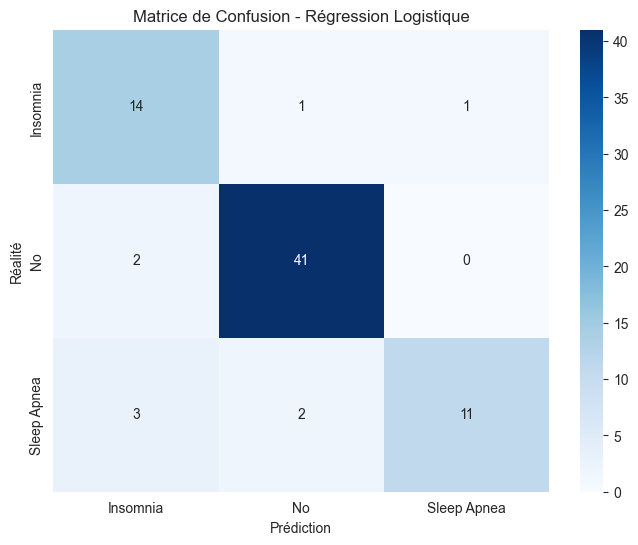

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Création et Entraînement de la Pipeline
# On met max_iter=1000 car parfois la régression logistique a besoin de temps pour converger
model_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

print("Entraînement de la Régression Logistique...")
model_lr.fit(X_train, y_train) # On passe X_train BRUT (le pipeline s'occupe de transformer)

# 2. Prédictions
y_pred_lr = model_lr.predict(X_test)

# 3. Métriques (Question 2)
acc_lr = accuracy_score(y_test, y_pred_lr)
# average='macro' car on a 3 classes. Ça fait la moyenne des scores de chaque classe.
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f"\n--- Résultats Régression Logistique ---")
print(f"Accuracy : {acc_lr:.4f}")
print(f"F1-Score (Macro) : {f1_lr:.4f}")

# 4. Matrice de Confusion (Question 2c et 3)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Affichage visuel (Heatmap)
plt.figure(figsize=(8, 6))
# On récupère les noms des classes automatiquement
classes = model_lr.classes_
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()


--- Résultats Arbre de Décision ---
Accuracy : 0.8800
F1-Score : 0.8360


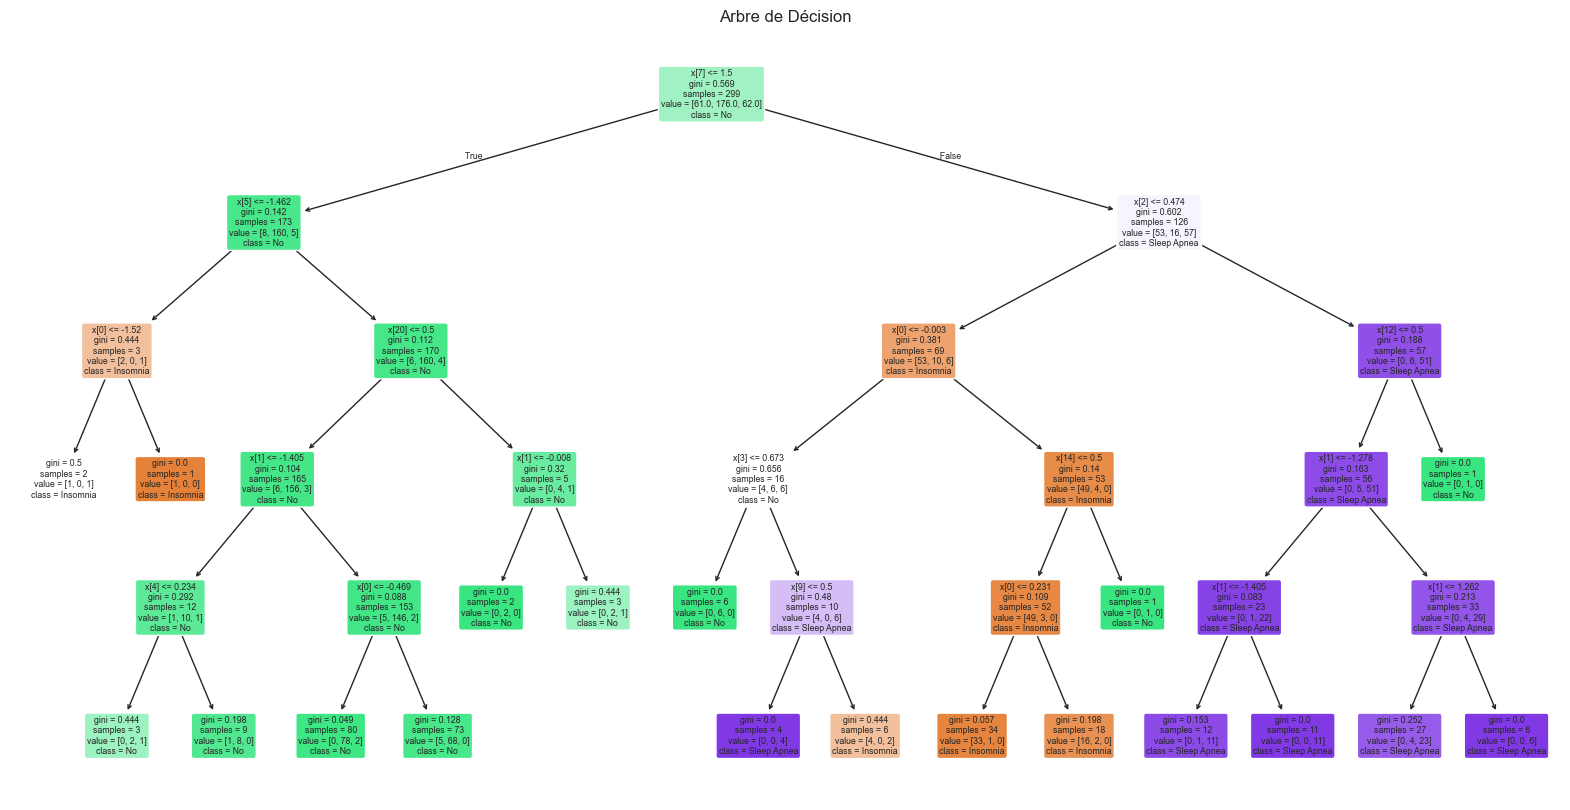

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Entraînement
model_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42, max_depth=5))
# J'ai limité la profondeur à 5 pour que le dessin reste lisible
model_dt.fit(X_train, y_train)

# 2. Métriques
y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print(f"\n--- Résultats Arbre de Décision ---")
print(f"Accuracy : {acc_dt:.4f}")
print(f"F1-Score : {f1_dt:.4f}")

# 3. Visualisation de l'arbre (Question 3)
plt.figure(figsize=(20, 10))
# On doit accéder à l'étape 'decisiontreeclassifier' de la pipeline pour le dessiner
tree_step = model_dt.steps[-1][1]
# Pour afficher les noms des features, c'est compliqué avec un ColumnTransformer,
# donc on met juste les noms des classes pour l'instant.
plot_tree(tree_step, filled=True, class_names=model_dt.classes_, rounded=True)
plt.title("Arbre de Décision")
plt.show()

In [54]:
from sklearn.svm import SVC

# 1. Entraînement
model_svm = make_pipeline(preprocessor, SVC(kernel='linear', random_state=42))
model_svm.fit(X_train, y_train)

# 2. Métriques
y_pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"\n--- Résultats SVM (Kernel Linéaire) ---")
print(f"Accuracy : {acc_svm:.4f}")
print(f"F1-Score : {f1_svm:.4f}")


--- Résultats SVM (Kernel Linéaire) ---
Accuracy : 0.8800
F1-Score : 0.8488


In [52]:
import pandas as pd

results = pd.DataFrame({
    'Modèle': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [acc_lr, acc_dt, acc_svm],
    'F1-Score': [f1_lr, f1_dt, f1_svm]
})

print("\n--- TABLEAU COMPARATIF ---")
print(results)


--- TABLEAU COMPARATIF ---
                Modèle  Accuracy  F1-Score
0  Logistic Regression      0.88  0.842748
1        Decision Tree      0.88  0.836030
2                  SVM      0.88  0.848847


### pour aller plus loin

In [55]:
# On teste un SVM avec un noyau RBF (courbe) et une régularisation différente
super_svm = make_pipeline(preprocessor, SVC(kernel='rbf', C=10, random_state=42))

super_svm.fit(X_train, y_train)
y_pred_super = super_svm.predict(X_test)

print(f"Ancien SVM Accuracy : {acc_svm:.4f}")
print(f"Nouveau SVM Accuracy : {accuracy_score(y_test, y_pred_super):.4f}")

Ancien SVM Accuracy : 0.8800
Nouveau SVM Accuracy : 0.8667
